In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = yf.download("INFY.NS", period="5y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24096\1956484635.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("INFY.NS", period="5y")
[*********************100%***********************]  1 of 1 completed


In [3]:
print(df.columns) #Detected additional column

MultiIndex([( 'Close', 'INFY.NS'),
            (  'High', 'INFY.NS'),
            (   'Low', 'INFY.NS'),
            (  'Open', 'INFY.NS'),
            ('Volume', 'INFY.NS')],
           names=['Price', 'Ticker'])


In [4]:
df.columns = [col[0] for col in df.columns] #Flatten the dataset to make single column
df.head() 

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-25,628.303040,632.877387,622.024494,632.204685,14945284
2020-06-26,671.086914,674.136461,636.823979,637.003377,26030458
2020-06-29,656.332275,667.947596,654.852311,659.606110,8954428
2020-06-30,660.099426,662.790232,649.605274,657.274059,10411290
2020-07-01,656.466919,665.795013,654.538486,661.265501,5477468


In [5]:
df.isnull().sum() #No NaN values present (Happy happy happy)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

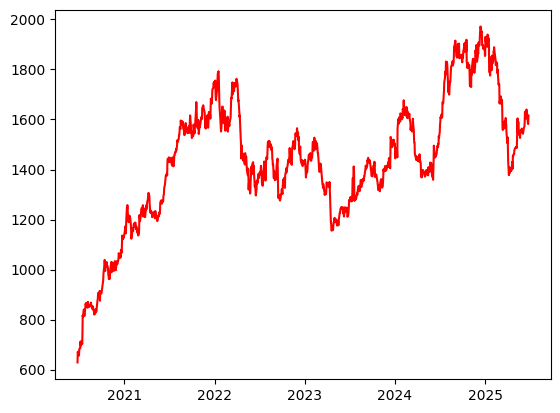

In [6]:
plt.plot(df.index, df["Close"], color="red")

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled #numpy array(can't use reshape, so convert back to Dataframe using pandas)

array([[0.        , 0.        , 0.        , 0.        , 0.16526524],
       [0.0318415 , 0.03065918, 0.01114305, 0.00359302, 0.28784531],
       [0.0208605 , 0.0260603 , 0.0247172 , 0.02051683, 0.09901824],
       ...,
       [0.71126858, 0.71940154, 0.7178295 , 0.72538587, 0.08784132],
       [0.70948239, 0.72534626, 0.71873299, 0.72538587, 0.08939294],
       [0.73426564, 0.73344595, 0.72513293, 0.71714961, 0.08639264]],
      shape=(1240, 5))

In [8]:
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
scaled_df

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-25,0.000000,0.000000,0.000000,0.000000,0.165265
2020-06-26,0.031842,0.030659,0.011143,0.003593,0.287845
2020-06-29,0.020860,0.026060,0.024717,0.020517,0.099018
2020-06-30,0.023664,0.022228,0.020767,0.018771,0.115128
2020-07-01,0.020961,0.024461,0.024481,0.021759,0.060570
...,...,...,...,...,...
2025-06-19,0.736870,0.740951,0.745010,0.742532,0.056924
2025-06-20,0.740220,0.741471,0.743053,0.738863,0.101765
2025-06-23,0.711269,0.719402,0.717830,0.725386,0.087841


In [9]:
def create_sequences(data, window_size, horizon, target_col_index):
    X = []
    y = []
    for i in range(len(data) - window_size - horizon + 1):
        X_seq = data[i:i+window_size]
        y_value = data[i + window_size + horizon -1, target_col_index]
        X.append(X_seq)
        y.append(y_value)
    return np.array(X), np.array(y)

In [10]:
X, y = create_sequences(scaled_df.values, window_size=40, horizon=3, target_col_index=0)
print(X.shape)
print(y.shape)

(1198, 40, 5)
(1198,)


In [11]:
#we won't use train_test_split because even with shuffle = false, it can randomize the data, we don't want that here
n_total = len(X)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

X_train = X[:n_train]
y_train = y[:n_train]

X_val = X[n_train : n_train + n_val]
y_val = y[n_train : n_train + n_val]

X_test = X[n_train + n_val:]
y_test = y[n_train + n_val:]

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(838, 40, 5) (239, 40, 5) (121, 40, 5) (838,) (239,) (121,)


In [12]:
np.save("../data/X_train.npy", X_train)
np.save("../data/y_train.npy", y_train)
np.save("../data/X_val.npy", X_val)
np.save("../data/y_val.npy", y_val)
np.save("../data/X_test.npy", X_test)
np.save("../data/y_test.npy", y_test)